In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
from imblearn.over_sampling import SMOTE

In [2]:
!pip install imbalanced-learn

In [3]:
dataset = pd.read_csv('/content/travel insurance.csv')
dataset.head(10)

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
5,JZI,Airlines,Online,Value Plan,No,66,UNITED STATES,-121.0,42.35,F,44
6,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,47,UNITED STATES,-39.6,23.76,NaN,32
7,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,63,AUSTRALIA,-108.9,65.34,NaN,29
8,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,57,THAILAND,-19.8,11.88,NaN,44
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186,AUSTRALIA,-99.0,59.40,NaN,37


In [4]:
print ('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(dataset.shape,dataset.shape[0],dataset.shape[1]))

Shape of the dataset is (63326, 11). This dataset contains 63326 rows and 11 columns.


In [5]:
# Check Class Imbalance
print("Class Distribution in 'Claim':")
print(dataset['Claim'].value_counts(normalize=True))

Class Distribution in 'Claim':
Claim
No     0.985361
Yes    0.014639
Name: proportion, dtype: float64


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB
None

Dataset Description (Quantitative Features):
           Duration     Net Sales  Commision (in value)           Age
count  63326.000000  63326.0000

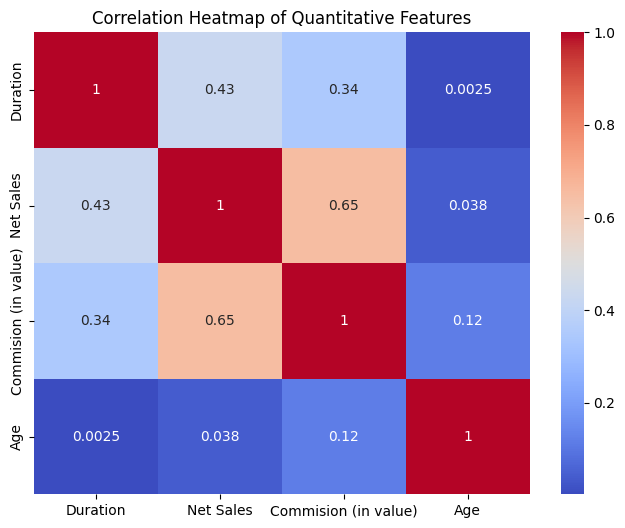


Class Distribution for 'Claim':
Claim
No     62399
Yes      927
Name: count, dtype: int64


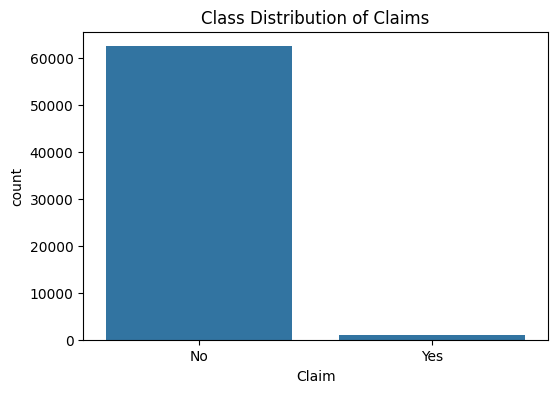

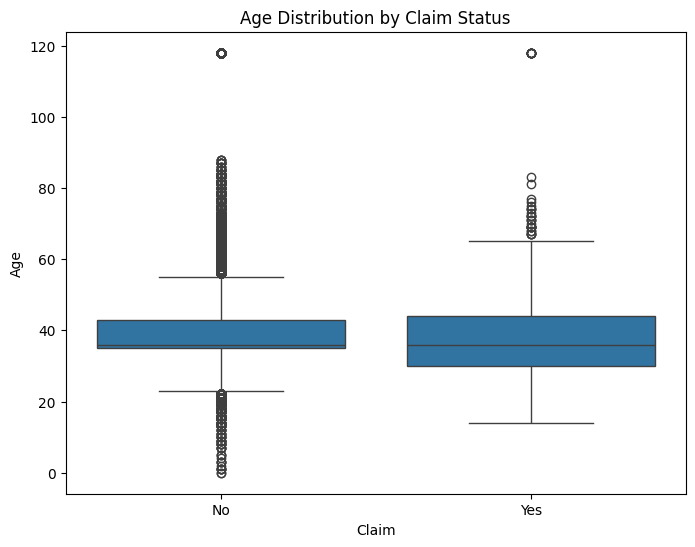

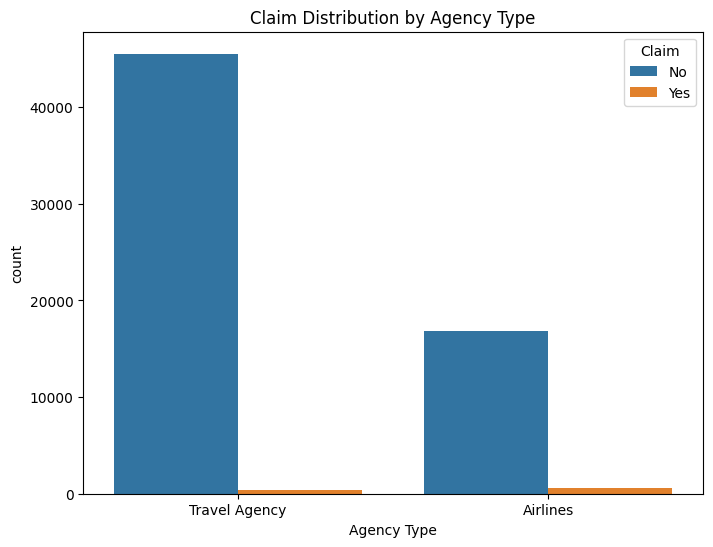

In [6]:
# Dataset Description
print("Dataset Info:")
print(dataset.info())
print("\nDataset Description (Quantitative Features):")
print(dataset[['Duration', 'Net Sales', 'Commision (in value)', 'Age']].describe())

# Classification Problem
print("\nThis is a classification problem as the target variable 'Claim' is categorical (Yes/No).")

# Correlation Analysis
plt.figure(figsize=(8, 6))
sns.heatmap(dataset[['Duration', 'Net Sales', 'Commision (in value)', 'Age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Quantitative Features')
plt.show()

# Class Imbalance
print("\nClass Distribution for 'Claim':")
print(dataset['Claim'].value_counts())
plt.figure(figsize=(6, 4))
sns.countplot(x='Claim', data=dataset)
plt.title('Class Distribution of Claims')
plt.show()

# Exploratory Data Analysis (EDA)
# Example 1: Claim vs. Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='Claim', y='Age', data=dataset)
plt.title('Age Distribution by Claim Status')
plt.show()
print()
# Example 2: Claim vs. Agency Type
plt.figure(figsize=(8, 6))
sns.countplot(x='Agency Type', hue='Claim', data=dataset)
plt.title('Claim Distribution by Agency Type')
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Check Missing Values
print("Missing Values:")
print(dataset.isnull().sum())

# Problem 1: Drop Gender column due to high missing values
dataset = dataset.drop('Gender', axis=1)

# Problem 2: Categorical Values
# Solution: Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination', 'Claim']
for col in categorical_cols:
    dataset[col] = le.fit_transform(dataset[col])

# Problem 3: Feature Scaling
# Solution: Normalize quantitative features
scaler = StandardScaler()
quantitative_cols = ['Duration', 'Net Sales', 'Commision (in value)', 'Age']
dataset[quantitative_cols] = scaler.fit_transform(dataset[quantitative_cols])

# Verify Pre-processing
print("\nDataset after Pre-processing:")
print(dataset.head())

Missing Values:
Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

Dataset after Pre-processing:
   Agency  Agency Type  Distribution Channel  Product Name  Claim  Duration  \
0       3            1                     0            12      0  1.342783   
1       3            1                     0            12      0  1.342783   
2       6            1                     1            16      0  0.154070   
3       6            1                     1            16      0  0.104950   
4       6            1                     1            16      0  0.291607   

   Destination  Net Sales  Commision (in value)       Age  
0           79  -1.426997             -0.012118  2.927182  
1           79 

In [8]:
# Dataset Splitting
X = dataset.drop('Claim', axis=1)
y = dataset['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Training Set Shape after SMOTE:', X_train_smote.shape)
print('Class Distribution after SMOTE:')
print(pd.Series(y_train_smote).value_counts())

Training Set Shape after SMOTE: (87358, 9)
Class Distribution after SMOTE:
Claim
0    43679
1    43679
Name: count, dtype: int64


In [9]:
# Model Training & Testing
# Model 1: KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_smote, y_train_smote)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred, zero_division=0)
knn_rec = recall_score(y_test, knn_pred, zero_division=0)
knn_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

# Model 2: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_smote, y_train_smote)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred, zero_division=0)
lr_rec = recall_score(y_test, lr_pred, zero_division=0)
lr_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])

# Model 3: Neural Network
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(X_train_smote, y_train_smote, epochs=10, batch_size=32, verbose=0)
nn_pred = (nn.predict(X_test) > 0.5).astype(int).flatten()
nn_acc = accuracy_score(y_test, nn_pred)
nn_prec = precision_score(y_test, nn_pred, zero_division=0)
nn_rec = recall_score(y_test, nn_pred, zero_division=0)
nn_prob = nn.predict(X_test).flatten()
nn_auc = roc_auc_score(y_test, nn_prob)

# Print Metrics
print('KNN - Accuracy:', knn_acc, 'Precision:', knn_prec, 'Recall:', knn_rec, 'AUC:', knn_auc)
print('Logistic Regression - Accuracy:', lr_acc, 'Precision:', lr_prec, 'Recall:', lr_rec, 'AUC:', lr_auc)
print('Neural Network - Accuracy:', nn_acc, 'Precision:', nn_prec, 'Recall:', nn_rec, 'AUC:', nn_auc)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
594/594 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
KNN - Accuracy: 0.8821981261185388 Precision: 0.04838709677419355 Recall: 0.3776978417266187 AUC: 0.675923299821681
Logistic Regression - Accuracy: 0.8359827350247394 Precision: 0.05683947532792005 Recall: 0.6546762589928058 AUC: 0.7938940193998647
Neural Network - Accuracy: 0.7639225181598063 Precision: 0.0459745305417656 Recall: 0.7661870503597122 AUC: 0.809928691662055


<Figure size 1000x600 with 0 Axes>

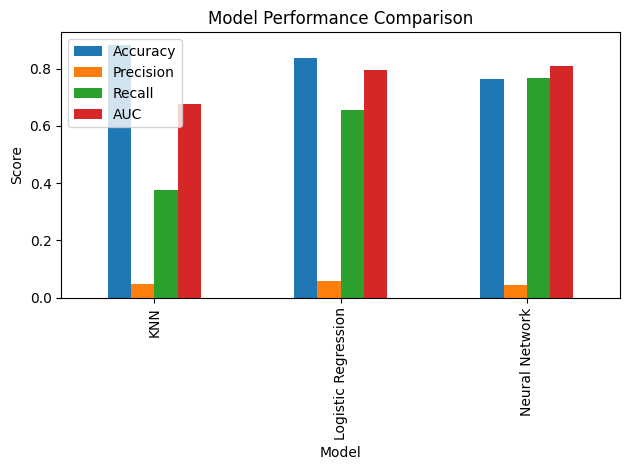

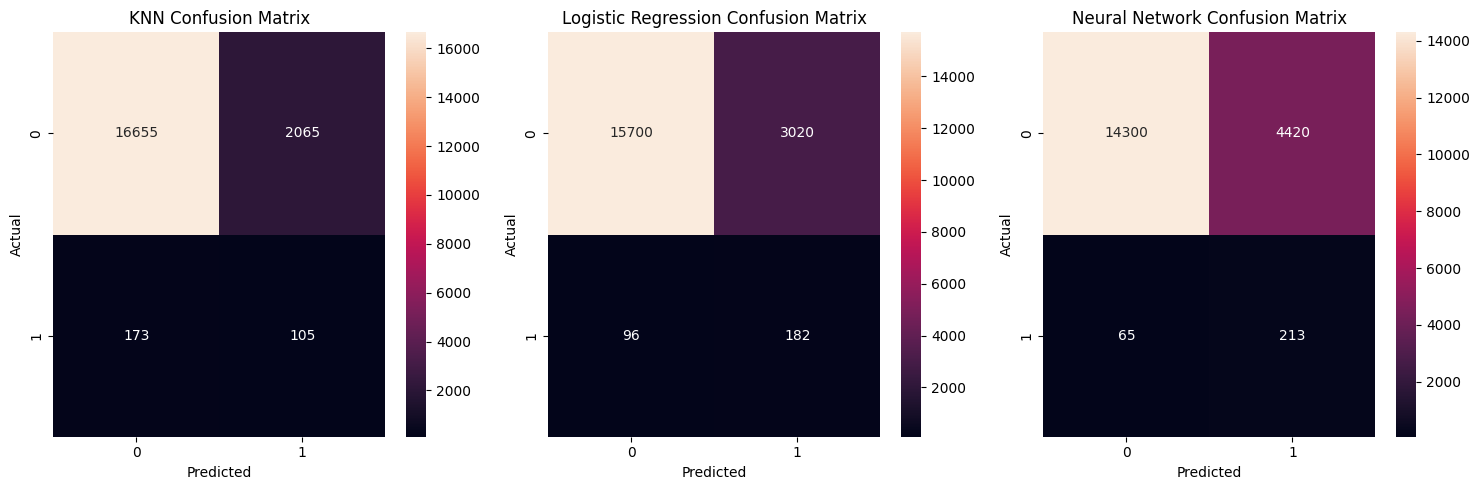

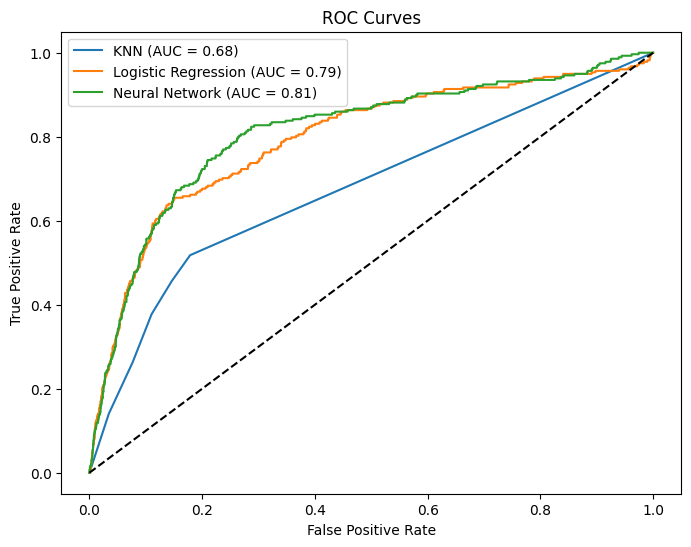

In [10]:
# Model Comparison
metrics = {
    'Model': ['KNN', 'Logistic Regression', 'Neural Network'],
    'Accuracy': [knn_acc, lr_acc, nn_acc],
    'Precision': [knn_prec, lr_prec, nn_prec],
    'Recall': [knn_rec, lr_rec, nn_rec],
    'AUC': [knn_auc, lr_auc, nn_auc]
}
metrics_df = pd.DataFrame(metrics)

# Bar Plot
plt.figure(figsize=(10, 6))
metrics_df.set_index('Model').plot(kind='bar')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, (pred, name) in enumerate([(knn_pred, 'KNN'), (lr_pred, 'Logistic Regression'), (nn_pred, 'Neural Network')]):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[i])
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')
plt.tight_layout()
plt.show()

# ROC Curves
plt.figure(figsize=(8, 6))
for model, pred_proba, name in [(knn, knn.predict_proba(X_test)[:, 1], 'KNN'),
                               (lr, lr.predict_proba(X_test)[:, 1], 'Logistic Regression'),
                               (nn, nn_prob, 'Neural Network')]:
    fpr, tpr, _ = roc_curve(y_test, pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()